In [1]:
import csv
import numpy as np
import sklearn.ensemble
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.font_manager import FontProperties

#Setting up the dictionary
posDictionary = {}
posDictionary['ADJ'] = 0
posDictionary['ADP'] = 1
posDictionary['ADV'] = 2
posDictionary['AUX'] = 3
posDictionary['CCONJ'] = 4
posDictionary['DET'] = 5
posDictionary['INTJ'] = 6
posDictionary['NOUN'] = 7
posDictionary['NUM'] = 8
posDictionary['PART'] = 9
posDictionary['PRON'] = 10
posDictionary['PROPN'] = 11
posDictionary['PUNCT'] = 12
posDictionary['SCONJ'] = 13
posDictionary['SYM'] = 14
posDictionary['VERB'] = 15
posDictionary['X'] = 16

reverseDictionary = {}
reverseDictionary['0'] = 'ADJ'
reverseDictionary['1'] = 'ADP'
reverseDictionary['2'] = 'ADV'
reverseDictionary['3'] = 'AUX'
reverseDictionary['4'] = 'CCONJ'
reverseDictionary['5'] = 'DET'
reverseDictionary['6'] = 'INTJ'
reverseDictionary['7'] = 'NOUN'
reverseDictionary['8'] = 'NUM'
reverseDictionary['9'] = 'PART'
reverseDictionary['10'] = 'PRON'
reverseDictionary['11'] = 'PROPN'
reverseDictionary['12'] = 'PUNCT'
reverseDictionary['13'] = 'SCONJ'
reverseDictionary['14'] = 'SYM'
reverseDictionary['15'] = 'VERB'
reverseDictionary['16'] = 'X'

PREVTAG = 2
NEXTTAG = 2

#Opening the training set file 
with open("ud21_for_POS_TAGGING-180325-train.txt", encoding="utf-8") as f:
    reader = csv.reader(f, delimiter="\t", quotechar=None)
    wordsArray = list(reader)

#Creating the Part of Speech list: dimension=367760x1
posList=[]
for i in range(0,len(wordsArray)):
    posList.append(wordsArray[i][1])
    
#Creating the Part of Speech set: dimension=17x1
posSet = sorted(set(posList))

In [2]:
#Opening the test set file 
with open("ud21_for_POS_TAGGING-180325-test.txt", encoding="utf-8") as f:
    reader = csv.reader(f, delimiter="\t", quotechar=None)
    wordsArrayTest = list(reader)

#Creating the Part of Speech list: dimension=367760x1
posListTest=[]
for i in range(0,len(wordsArrayTest)):
    posListTest.append(wordsArrayTest[i][1])
    
#SETTING UP TEST
XTest = np.zeros((len(wordsArrayTest)-PREVTAG-NEXTTAG, PREVTAG + NEXTTAG))
for i in range(PREVTAG, len(wordsArrayTest)-NEXTTAG):
    for j in range(-PREVTAG, NEXTTAG+1):
        if(j < 0):
            XTest[i-PREVTAG][j+PREVTAG]=posDictionary[posListTest[i+j]]
        if(j > 0):
            XTest[i-PREVTAG][j+PREVTAG-1]=posDictionary[posListTest[i+j]]
            
YTest = posListTest[NEXTTAG:]
YTest = YTest[:len(YTest)-PREVTAG]
for i in range(0, len(YTest)):
    YTest[i]=posDictionary[YTest[i]]

In [3]:
#Checking most frequent PoS tag, to determine a baseline
posTagFrequency = np.zeros(len(posSet))
print("Pos tag frequency array")
for i in range(0, len(wordsArrayTest)):
    posTagFrequency[posDictionary[wordsArrayTest[i][1]]] += 1
posTagFrequency /= len(wordsArrayTest)
print(posTagFrequency)

print("Most frequent tag is " + reverseDictionary[str(np.argmax(posTagFrequency))] + " with a frequence of " + str(np.amax(posTagFrequency)))

Pos tag frequency array
[ 0.06176558  0.14495902  0.04305322  0.03860966  0.02626642  0.15330305
  0.0036536   0.18672855  0.01540436  0.          0.04157204  0.05603831
  0.10817616  0.01130641  0.01520687  0.08887133  0.00508542]
Most frequent tag is NOUN with a frequence of 0.186728547447


In [4]:


X =  np.zeros((len(wordsArray)-PREVTAG-NEXTTAG, PREVTAG + NEXTTAG))

for i in range(PREVTAG, len(wordsArray)-NEXTTAG):
    for j in range(-PREVTAG, NEXTTAG+1):
        if(j < 0):
            X[i-PREVTAG][j+PREVTAG]=posDictionary[posList[i+j]]
        if(j > 0):
            X[i-PREVTAG][j+PREVTAG-1]=posDictionary[posList[i+j]]
            
Y = np.zeros(len(wordsArray)-PREVTAG-NEXTTAG)

for i in range(PREVTAG, len(wordsArray)-NEXTTAG):
    Y[i-PREVTAG]= int(posDictionary[posList[i]])

In [20]:
#ADABOOST TRAINING
adaBoostModel = sklearn.ensemble.AdaBoostClassifier()
adaBoostModel = adaBoostModel.fit(X, Y)

In [6]:
#DECISION TREE
treeClassifierModel = tree.DecisionTreeClassifier()
treeClassifierModel = treeClassifierModel.fit(X, Y)



In [ ]:
import graphviz
featuresPos = ["-2", "-1", "+1", "+2"]
dot_data = tree.export_graphviz(treeClassifierModel, out_file=None, 
                         feature_names=featuresPos,
                         class_names=posSet, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [22]:
#GAUSSIAN NAIVE BAYES
gnbModel = GaussianNB()
gnbModel = gnbModel.fit(X, Y)

In [23]:
#LOGISTIC REGRESSION
lrModel = LogisticRegression()
lrModel = lrModel.fit(X,Y)

In [24]:
#ACCURACIES

print("ADABOOST: ")
print("model accuracy is " + str(adaBoostModel.score(XTest, YTest)))
print()

print("DECISION TREE: ")
print("model accuracy is " + str(treeClassifierModel.score(XTest, YTest)))
print()

print("GAUSSIAN NAIVE BAYES: ")
print("model accuracy is " + str(gnbModel.score(XTest, YTest)))
print()

print("LOGISTIC REGRESSION: ")
print("model accuracy is " + str(lrModel.score(XTest, YTest)))
print()

ADABOOST: 
model accuracy is 0.424543209877

DECISION TREE: 
model accuracy is 0.584592592593

GAUSSIAN NAIVE BAYES: 
model accuracy is 0.348641975309

LOGISTIC REGRESSION: 
model accuracy is 0.214518518519



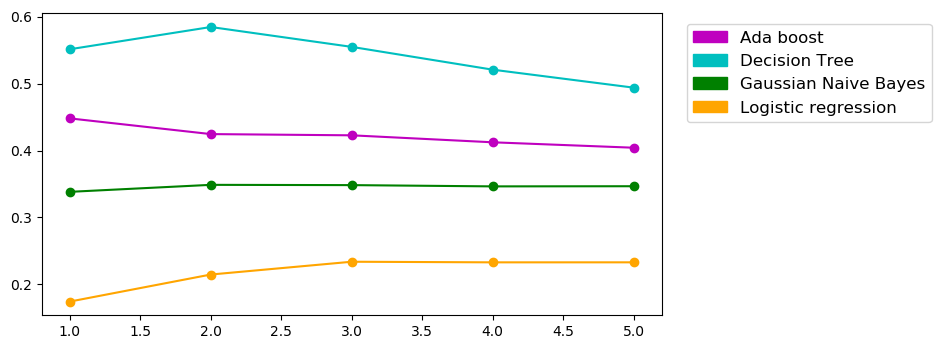

In [25]:
#Plotting
wordsNumber = [1,2,3,4,5]
colors =['m', 'c', 'g', 'orange']
mlResults = [[0.448005135295, 0.424543209877, 0.422708415646, 0.412278968685, 0.404169136534], 
             [0.551451708473, 0.584691358025, 0.55496839194, 0.520893015904, 0.494022920371],
             [0.338188820857, 0.348641975309, 0.348231924141, 0.346340017781, 0.34657182375],
             [0.17410626111, 0.214518518519, 0.23365270644, 0.232737330831, 0.232760324047]]

redLabel= mpatches.Patch(color='m', label='Ada boost')
blueLabel= mpatches.Patch(color='c', label='Decision Tree')
greenLabel= mpatches.Patch(color='green', label='Gaussian Naive Bayes')
yellowLabel= mpatches.Patch(color='orange', label='Logistic regression')

fig = plt.figure(figsize=(8, 4), dpi=100)
for i in range(0, len(colors)):
    plt.plot(wordsNumber, mlResults[i], '-o', linestyle='-', color=colors[i])

plt.legend(handles=[redLabel, blueLabel, greenLabel, yellowLabel], loc=(1.04, 0.64), prop={'size': 12})
plt.show()